<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Попробуйте предсказать цену акций 
# (https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv) с помощью LSTM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv', usecols=[1])
df

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


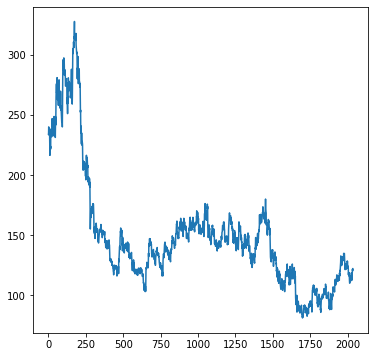

In [5]:
plt.figure(figsize=(6,6))
plt.plot(df)
plt.show()

In [6]:
dataset = df.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1526 509


In [7]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# MODEL

In [9]:
model = Sequential()
model.add(Bidirectional(LSTM(4, dropout=0.2, return_sequences=True), input_shape=(1, look_back)))
model.add(Bidirectional(LSTM(4, dropout=0.2)))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 8)              192       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1524/1524 - 3s - loss: 0.0225
Epoch 2/100
1524/1524 - 3s - loss: 0.0121
Epoch 3/100
1524/1524 - 2s - loss: 0.0105
Epoch 4/100
1524/1524 - 3s - loss: 0.0107
Epoch 5/100
1524/1524 - 3s - loss: 0.0094
Epoch 6/100
1524/1524 - 3s - loss: 0.0067
Epoch 7/100
1524/1524 - 3s - loss: 0.0063
Epoch 8/100
1524/1524 - 3s - loss: 0.0053
Epoch 9/100
1524/1524 - 3s - loss: 0.0058
Epoch 10/100
1524/1524 - 3s - loss: 0.0051
Epoch 11/100
1524/1524 - 3s - loss: 0.0053
Epoch 12/100
1524/1524 - 3s - loss: 0.0050
Epoch 13/100
1524/1524 - 3s - loss: 0.0044
Epoch 14/100
1524/1524 - 3s - loss: 0.0047
Epoch 15/100
1524/1524 - 3s - loss: 0.0048
Epoch 16/100
1524/1524 - 3s - loss: 0.0048
Epoch 17/100
1524/1524 - 3s - loss: 0.0029
Epoch 18/100
1524/1524 - 3s - loss: 0.0044
Epoch 19/100
1524/1524 - 3s - loss: 0.0044
Epoch 20/100
1524/1524 - 3s - loss: 0.0027
Epoch 21/100
1524/1524 - 3s - loss: 0.0050
Epoch 22/100
1524/1524 - 3s - loss: 0.0041
Epoch 23/100
1524/1524 - 3s - loss: 0.0027
Epoch 24/100
1524/15

In [11]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([Y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 28.53 RMSE
Test Score: 30.71 RMSE


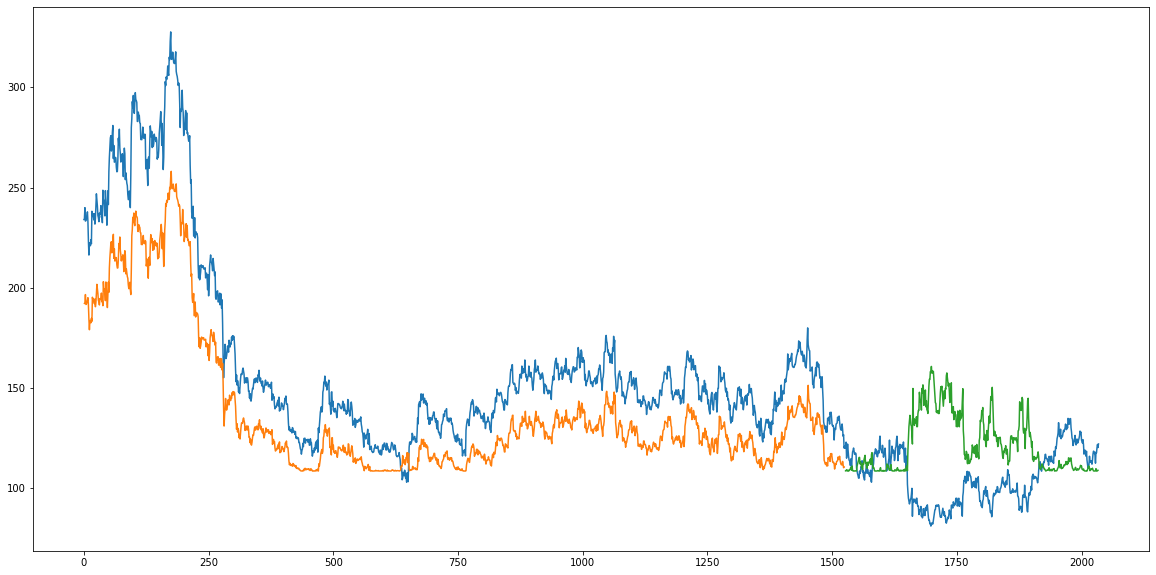

In [15]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
# Вывод:
# нейронка не уга9ала